# BigMart Sales Data

## Import Package/Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

## Data Wrangling
### Gathering Data

In [2]:
sales_data_df = pd.read_csv("BigMart_Sales_Data/Train.csv")
sales_data_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Assessing Data

In [3]:
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There is an inconsistency in the data count.

In [4]:
sales_data_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [5]:
sales_data_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The dataset contains missing values in the Item_Weight column (1463) and the Outlet_Size column (2410)

In [6]:
sales_data_df.shape

(8523, 12)

In [7]:
print("Number of duplicates: ", sales_data_df.duplicated().sum())

Number of duplicates:  0


In [8]:
sales_data_df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### Cleaning Data

In [9]:
sales_data_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
sales_data_df[sales_data_df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [11]:
sales_data_df["Item_Weight"] = sales_data_df["Item_Weight"].fillna(value=sales_data_df["Item_Weight"].mean())

In [12]:
sales_data_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
sales_data_df[sales_data_df["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [14]:
sales_data_df["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [15]:
sales_data_df['Outlet_Size'] = sales_data_df['Outlet_Size'].fillna(value="not_defined")

In [16]:
sales_data_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
q25, q75 = np.percentile(sales_data_df["Item_Visibility"], 25), np.percentile(sales_data_df["Item_Visibility"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in sales_data_df["Item_Visibility"] if x < minimum or x > maximum]

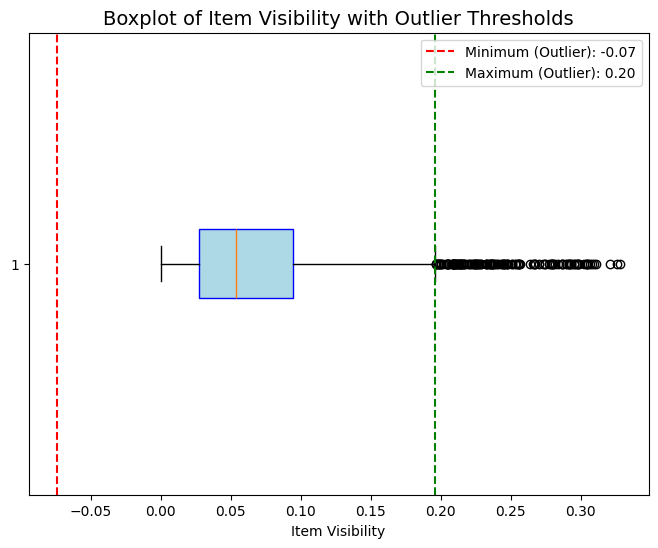

Q1 (25th percentile): 0.0269894775
Q3 (75th percentile): 0.0945852925
IQR: 0.067595815
Minimum Threshold: -0.07440424500000001
Maximum Threshold: 0.195979015
Number of Outliers: 144


In [18]:
# Visualisasi menggunakan boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(sales_data_df["Item_Visibility"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))

# Menambahkan garis batas outlier
plt.axvline(minimum, color='red', linestyle='--', label=f'Minimum (Outlier): {minimum:.2f}')
plt.axvline(maximum, color='green', linestyle='--', label=f'Maximum (Outlier): {maximum:.2f}')

# Label dan judul
plt.title('Boxplot of Item Visibility with Outlier Thresholds', fontsize=14)
plt.xlabel('Item Visibility')
plt.legend(loc='upper right', fontsize=10)
plt.show()

# Print hasil untuk tambahan analisis
print(f"Q1 (25th percentile): {q25}")
print(f"Q3 (75th percentile): {q75}")
print(f"IQR: {iqr}")
print(f"Minimum Threshold: {minimum}")
print(f"Maximum Threshold: {maximum}")
print(f"Number of Outliers: {len(outliers)}")

## Exploratory Data Analysis (EDA)

In [19]:
sales_data_df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
839,FDV12,16.700000,Regular,0.060863,Baking Goods,97.6384,OUT035,2004,Small,Tier 2,Supermarket Type1,2857.6136
6415,FDZ04,9.310000,Low Fat,0.063529,Frozen Foods,63.7510,OUT010,1998,not_defined,Tier 3,Grocery Store,126.5020
5299,FDF44,12.857645,Regular,0.059439,Fruits and Vegetables,130.9968,OUT027,1985,Medium,Tier 3,Supermarket Type3,4828.3816
5008,FDQ32,17.850000,Regular,0.046608,Fruits and Vegetables,122.9388,OUT046,1997,Small,Tier 1,Supermarket Type1,3095.9700
832,FDD36,12.857645,Low Fat,0.021171,Baking Goods,117.6124,OUT027,1985,Medium,Tier 3,Supermarket Type3,2251.7356


In [20]:
item_df = sales_data_df.groupby(by="Item_Type").agg({
    "Item_Identifier": "nunique",
    "Item_MRP": ["min", "max"]
})
item_df.sort_values(by=("Item_Identifier", "nunique"), ascending=False)

Item_Identifier Item_MRP          
                              nunique      min       max
Item_Type                                               
Fruits and Vegetables             220  36.2506  264.2252
Snack Foods                       220  32.3558  264.9568
Household                         170  32.4558  264.7910
Frozen Foods                      155  31.9558  264.8910
Dairy                             125  33.4874  266.6884
Canned                            120  36.3506  266.8884
Baking Goods                      119  33.9874  265.5568
Health and Hygiene                 95  33.1216  266.6884
Soft Drinks                        80  31.2900  263.5910
Meat                               80  34.7532  261.5936
Breads                             45  31.9558  263.6594
Hard Drinks                        40  34.2532  261.4278
Starchy Foods                      30  34.0532  263.0252
Others                             30  35.0190  254.9040
Breakfast                          20  40.0480  234.9300
Seafood                            10  33.7216  240.2880

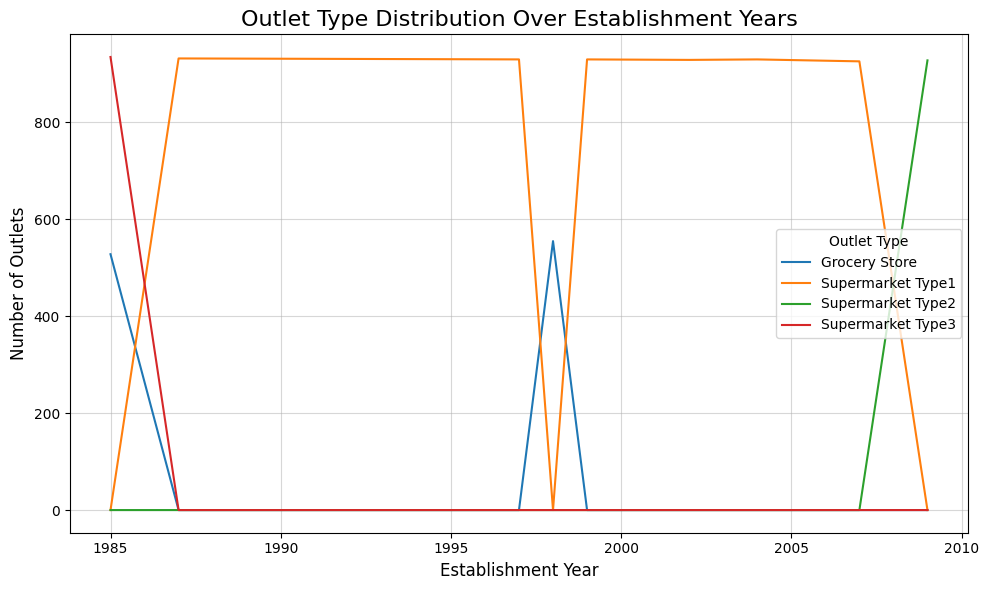

In [21]:
outlet_trend = sales_data_df.groupby(["Outlet_Establishment_Year", "Outlet_Type"]).size().reset_index(name="count")

# Pivot data
outlet_pivot = outlet_trend.pivot(index="Outlet_Establishment_Year", columns="Outlet_Type", values="count").fillna(0)

# line chart
plt.figure(figsize=(10, 6))
for outlet_type in outlet_pivot.columns:
    plt.plot(outlet_pivot.index, outlet_pivot[outlet_type], label=outlet_type)

plt.title("Outlet Type Distribution Over Establishment Years", fontsize=16)
plt.xlabel("Establishment Year", fontsize=12)
plt.ylabel("Number of Outlets", fontsize=12)
plt.legend(title="Outlet Type", fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()

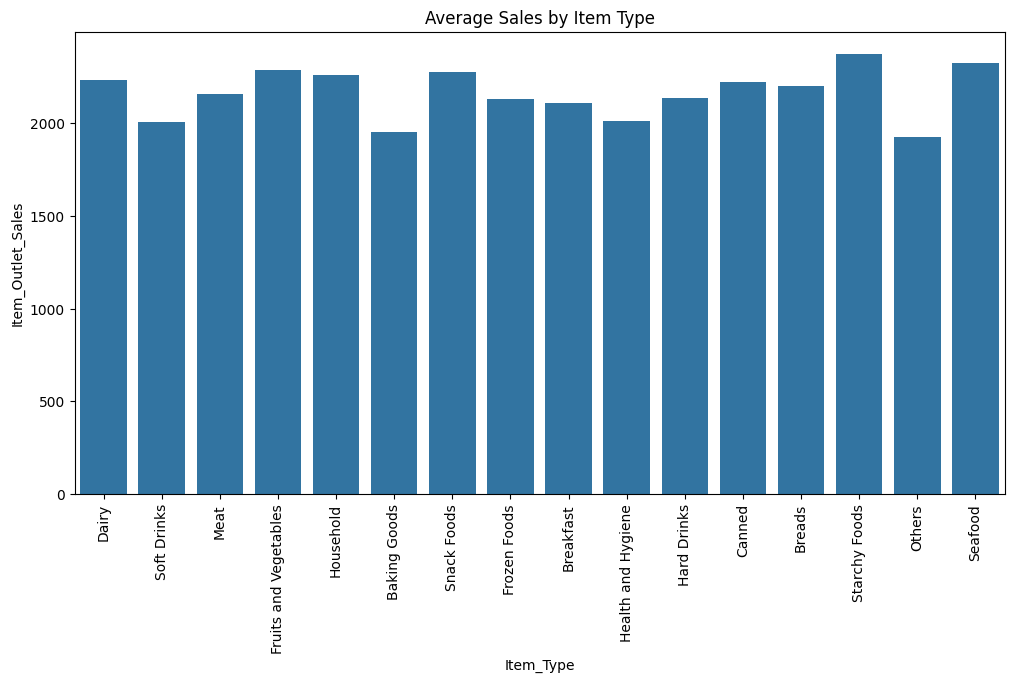

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=sales_data_df, errorbar=None)
plt.xticks(rotation=90)
plt.title("Average Sales by Item Type")
plt.show()

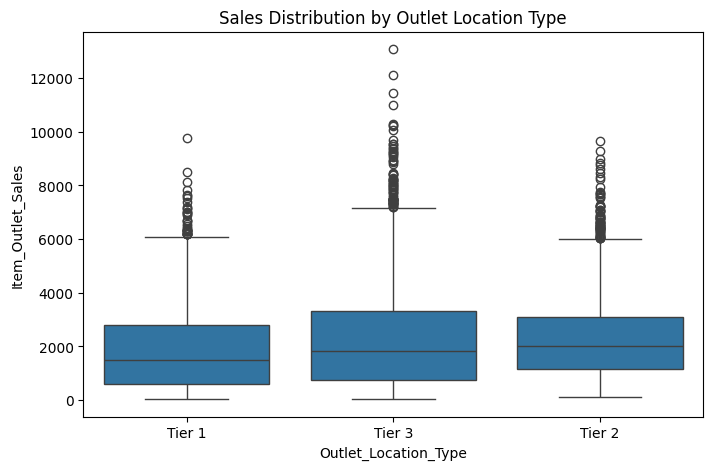

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=sales_data_df)
plt.title("Sales Distribution by Outlet Location Type")
plt.show()

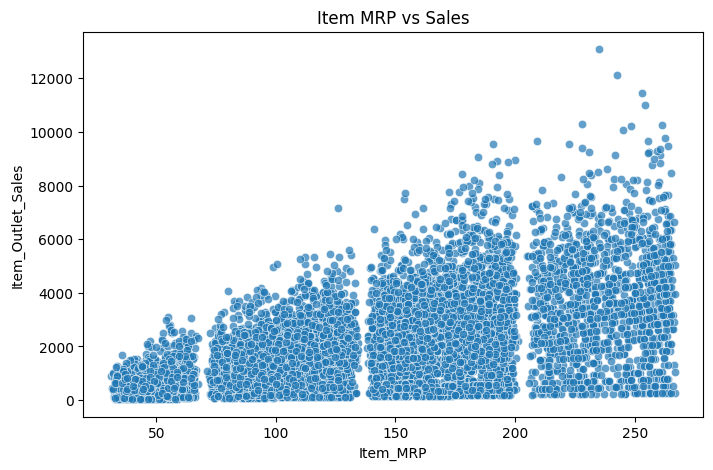

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=sales_data_df, alpha=0.7)
plt.title("Item MRP vs Sales")
plt.show()

In [25]:
# Feature Selection dan Splitting Data
X = sales_data_df.drop(["Item_Identifier", "Item_Outlet_Sales"], axis=1)
y = sales_data_df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [27]:
le = LabelEncoder()

for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [28]:
# Train
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [29]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error: 773.89
R-squared: 0.5563


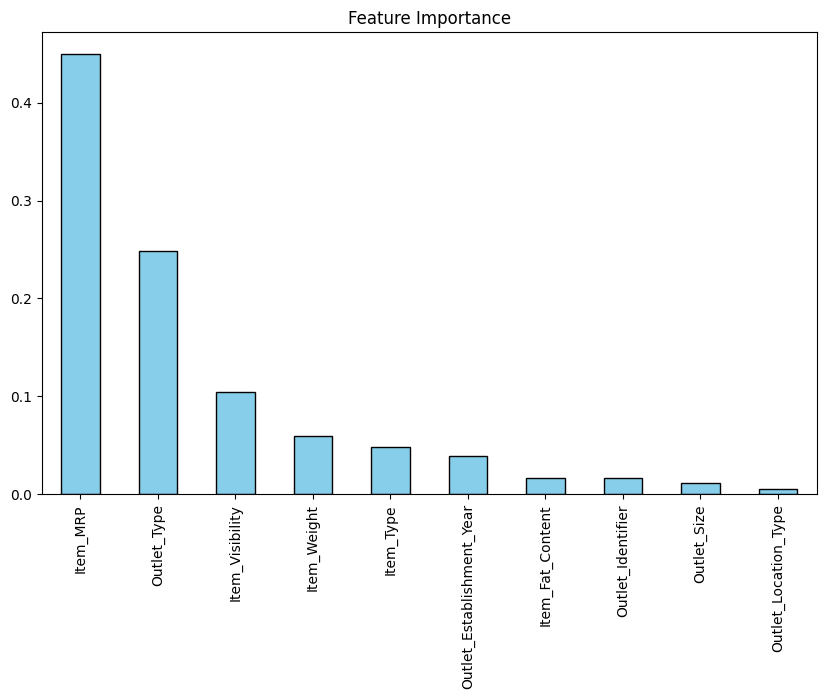

In [30]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar', figsize=(10, 6), color="skyblue", edgecolor='black')
plt.title("Feature Importance")
plt.show()

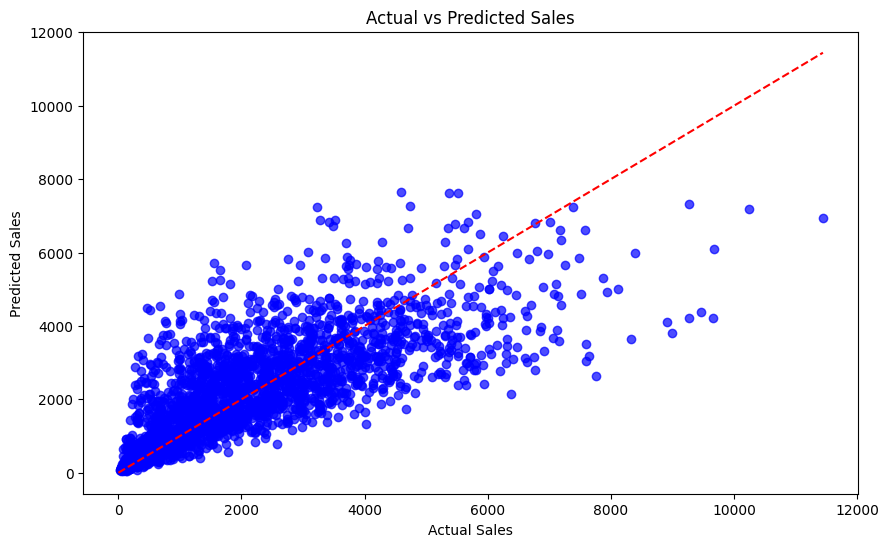

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')  # Perfect prediction line
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()